# Clothes Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of Lab 2 on SVM: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student surname: ERARSLAN

Student name: Aras Umut
    
ID: 2005627

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.22.1


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generatoryour (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 123456
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [64 53 57 63 71 57 63 56 60 56]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [64 53 57 63 71 57 63 56 60 56]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


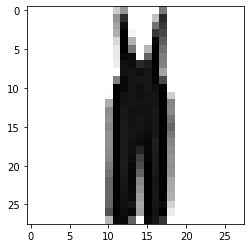

LABEL: 1
INPUT:


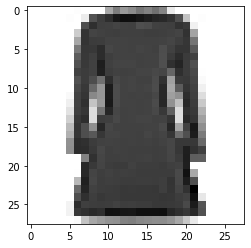

LABEL: 3
INPUT:


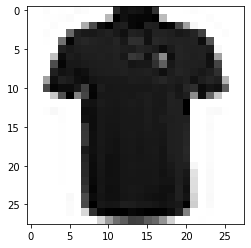

LABEL: 0


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
import pandas as pd

# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (30,), (20,20,), (30,30,20) ]}

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=.1)

grid = GridSearchCV(mlp, parameters, refit = True, verbose = 0, cv=5)
grid.fit(X_train,y_train)


print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(grid.best_params_)

print("Score with best parameters:")
print(grid.best_score_)

print("\nAll scores on the grid:")
print(pd.DataFrame(grid.cv_results_))

C:\Users\arasu\anaconda3\envs\PythonGPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\arasu\anaconda3\envs\PythonGPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\arasu\anaconda3\envs\PythonGPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (30,)}
Score with best parameters:
0.76

All scores on the grid:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.680664      0.279833         0.000997    5.560829e-07   
1       0.691460      0.099438         0.000399    4.884609e-04   
2       0.619896      0.025430         0.000399    4.885777e-04   
3       0.249541      0.066872         0.000997    4.264961e-07   
4       0.335626      0.101400         0.000997    1.784161e-07   

  param_hidden_layer_sizes                                params  \
0                    (10,)         {'hidden_layer_sizes': (10,)}   
1                    (20,)         {'hidden_layer_sizes': (20,)}   
2                    (30,)         {'hidden_layer_sizes': (30,)}   
3                 (20, 20)      {'hidden_layer_sizes': (20, 20)}   
4             (30, 30, 20)  {'hidden_layer_sizes': (30, 30, 20)}   

   split0_test_score  split1_test_score  split2_test_scor

### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 128, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

mlp = MLPClassifier(max_iter=500, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=.1, hidden_layer_sizes=(30,))

grid = GridSearchCV(mlp, parameters, refit = True, verbose = 0, cv=kf)
grid.fit(X_train,y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(grid.best_params_)

print("Score with best parameters:")
print(grid.best_score_)

print("\nAll scores on the grid:")
print(pd.DataFrame(grid.cv_results_))

RESULTS FOR NN

Best parameters set found:
{'batch_size': 128}
Score with best parameters:
0.7683333333333333

All scores on the grid:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.772629      3.394775         0.000798    3.989697e-04   
1       0.666557      0.127307         0.000798    3.991374e-04   
2       0.637480      0.042296         0.000598    4.882274e-04   
3       0.822666      0.068926         0.000997    6.572747e-07   

  param_batch_size               params  split0_test_score  split1_test_score  \
0                1    {'batch_size': 1}           0.083333           0.066667   
1               32   {'batch_size': 32}           0.716667           0.616667   
2              128  {'batch_size': 128}           0.725000           0.808333   
3              480  {'batch_size': 480}           0.733333           0.791667   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.133333           0.116667     

### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

Among hidden layer sizes, 1 layer with 30 neurons has the highest accuracy while 3 layers with 30, 30, 20 neurons have by far the worst accuracy. Also, 1 layer with 20 neurons has acceptable accuracy. We can see that, in this dataset and with these parameters, it is better to use 1 layer with more neurons. To check it, I tried 1 layer with 100 neurons and I got slightly better accuracy than 1 layer with 30 neurons. Also, It seems when the model gets complicated, It takes less time to train it with these parameters but when we change learning rate and tol, complicated neural networks take more time to train.

About the batch sizes, SGD gives the worst accuracy(10%) while mini-batch with 128 batch size gives the best accuracy(76.833). Also, GD gives an accuracy that is very close to 128 batch size. The algorithm could not converge when I use GD. Also about time, SGD takes by far the highest fit time with these parameters and  the dataset. It seems that with all other batch sizes it almost takes equal time to train but we need to consider learning rate is 0.1 and tol is 1e-4. When we lower the learning rate or tol, we can see that it takes more time to train when batch size is lesser with this dataset.

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 300 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 1.14 sec

Training MLP of size (20,) ...
Done, training time: 0.95 sec

Training MLP of size (30,) ...
Done, training time: 0.85 sec

Training MLP of size (30, 20) ...
Done, training time: 0.39 sec

Training MLP of size (30, 30, 20) ...
Done, training time: 0.48 sec



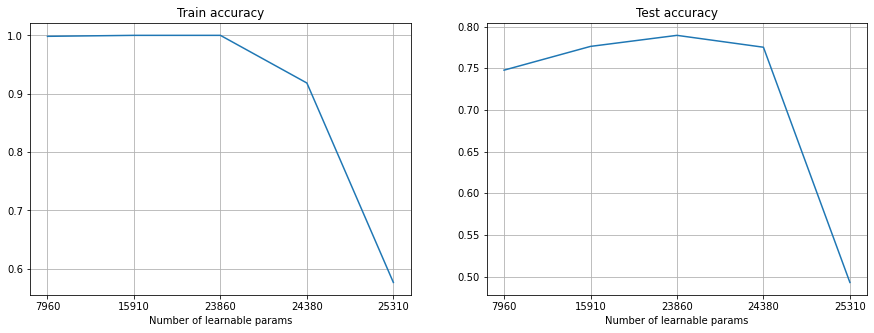

In [10]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (30,), (30,20,), (30,30,20)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    
    mlp = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=.1, hidden_layer_sizes=hl_size, batch_size = 128)
    mlp.fit(X_train, y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)

## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]

If we look at train accuracy, the accuracy is 100% with single layers. When we check test accuracy that belongs to single layers, we see that the layer that has the highest neurons has the highest accuracy. We can see that, there is overfitting with the single layers. The difference between train and test accuracy is very high and it becomes smaller when we increase neurons on the single layer. With 2 layers, we can see that training accuracy is around 92% while test accuracy is a little lower than a single layer with 20 neurons. The accuracies for 2 layer network is more balanced if we compare it with the 1 layer ones. About the 3 layer network, we can clearly see that there is underfitting here. Even the training accuracy is less than 60% that is unacceptable for most cases.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 600 iterations. 

C:\Users\arasu\anaconda3\envs\PythonGPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


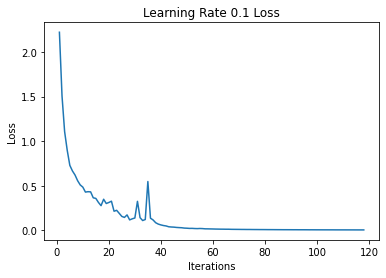

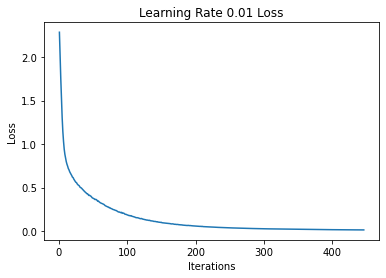

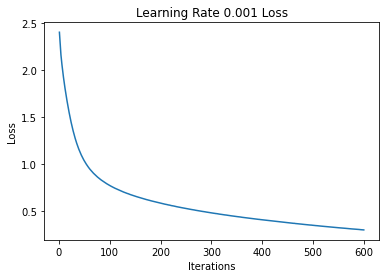

RESULTS FOR NN

Best parameters set found:
Learning_rate_init:  0.1
Score with best parameters:
0.7895


In [11]:
import matplotlib.pyplot as plt
import operator

#lr_list = [0.001, 0.01, 0.1]
lr_list = [10**exp for exp in range(-3,0)]
losses = {}
best_param = 0
best_score = 0

for lr in lr_list: 
    mlp = MLPClassifier(max_iter=600, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=lr, hidden_layer_sizes=(30,), batch_size = 128)
    mlp.fit(X_train, y_train)
    losses[lr] = mlp.loss_curve_
    test_score = mlp.score(X_test, y_test)
    if(best_score < test_score):
        best_score = test_score
        best_param = lr

import matplotlib.pyplot as plt 

a = [1+exp for exp in range(0,len(losses[0.1]))]
b = losses[0.1]  
plt.plot(a, b) 
plt.xlabel('Iterations') 
plt.ylabel('Loss') 
plt.title('Learning Rate 0.1 Loss') 
plt.show() 

a = [1+exp for exp in range(0,len(losses[0.01]))]
b = losses[0.01]  
plt.plot(a, b) 
plt.xlabel('Iterations') 
plt.ylabel('Loss') 
plt.title('Learning Rate 0.01 Loss') 
plt.show() 

a = [1+exp for exp in range(0,len(losses[0.001]))]
b = losses[0.001]  
plt.plot(a, b) 
plt.xlabel('Iterations') 
plt.ylabel('Loss') 
plt.title('Learning Rate 0.001 Loss') 
plt.show() 


print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print("Learning_rate_init: ", best_param)

print("Score with best parameters:")
print(best_score)

### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]

As we can see on the 3 plots, the learning curve is more stable with the learning rates of 0.01 and 0.001 while the least stable learning curve is the learning curve with a learning rate of 0.1. About the iterations and speed, there is a huge difference between all the learning curves that is iteration of ~120, ~450, 600 for the learning rates of 0.1(fastest), 0.01, 0.001(slowest) respectively.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case.


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.210500


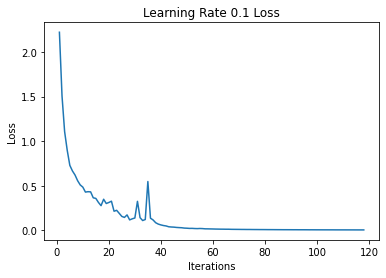

In [12]:
#get training and test error for the best NN model from CV

mlp = MLPClassifier(max_iter=600, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=0.1, hidden_layer_sizes=(30,), batch_size = 128)
mlp.fit(X_train, y_train)

training_error = 1 - mlp.score(X_train, y_train)
test_error = 1 - mlp.score(X_test, y_test)
loss = mlp.loss_curve_

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

a = [1+exp for exp in range(0,len(loss))]
b = loss  
plt.plot(a, b) 
plt.xlabel('Iterations') 
plt.ylabel('Loss') 
plt.title('Learning Rate 0.1 Loss') 
plt.show() 


## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [429 402 384 371 433 354 394 402 421 410]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [14]:
# use best architecture and params from before

mlp_large = MLPClassifier(max_iter=50, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=0.1, hidden_layer_sizes=(30,), batch_size = 128, verbose = True)
mlp_large.fit(X_train, y_train)

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN

training_error = 1 - mlp_large.score(X_train, y_train)
test_error = 1 - mlp_large.score(X_test, y_test)

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)


Iteration 1, loss = 1.17745432
Iteration 2, loss = 0.63794721
Iteration 3, loss = 0.52104103
Iteration 4, loss = 0.51911619
Iteration 5, loss = 0.44009532
Iteration 6, loss = 0.41416085
Iteration 7, loss = 0.38572196
Iteration 8, loss = 0.38377301
Iteration 9, loss = 0.36020989
Iteration 10, loss = 0.33043863
Iteration 11, loss = 0.32197500
Iteration 12, loss = 0.36465092
Iteration 13, loss = 0.32040575
Iteration 14, loss = 0.29838629
Iteration 15, loss = 0.30784473
Iteration 16, loss = 0.29117907
Iteration 17, loss = 0.25041631
Iteration 18, loss = 0.26879060
Iteration 19, loss = 0.24274040
Iteration 20, loss = 0.24550010
Iteration 21, loss = 0.28647775
Iteration 22, loss = 0.23288756
Iteration 23, loss = 0.21609992
Iteration 24, loss = 0.20730276
Iteration 25, loss = 0.21829077
Iteration 26, loss = 0.19978051
Iteration 27, loss = 0.19547594
Iteration 28, loss = 0.21399296
Iteration 29, loss = 0.19771192
Iteration 30, loss = 0.19002916
Iteration 31, loss = 0.19396880
Iteration 32, los

C:\Users\arasu\anaconda3\envs\PythonGPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]
NN that has a large number of samples = " L " 

NN that has 600 data points = " S "

The test error is slightly better with the L even the max iter is 50 for L and 600 for S. This shows that the number of samples has a very powerful impact on the accuracy. Also, the training error of L is 7% while it is 0% for S. When we compare the accuracies, we see that L has better test accuracy with a lower training accuracy. So we can see that L did not overfit while S has 0% training error which a sign of overfitting.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

Index of the item in y_test =  40945
Prediction of NN =  4
Prediction of Large NN =  2
True Label of the Object =  2
INPUT:


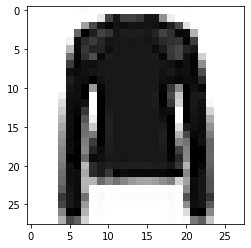

LABEL: 2


In [15]:
NN_prediction = mlp.predict(X_test)
large_NN_prediction = mlp_large.predict(X_test)

import random

wanted_objects_indexes = []
for i in range (0,len(y_test)):
    if(NN_prediction[i] != y_test[i]):
        if(large_NN_prediction[i] == y_test[i]):
            wanted_objects_indexes.append(i)

random_object_index = random.randint(0,len(wanted_objects_indexes)) #to see different objects
print("Index of the item in y_test = ", wanted_objects_indexes[random_object_index])
print("Prediction of NN = ", NN_prediction[wanted_objects_indexes[random_object_index]])
print("Prediction of Large NN = ", large_NN_prediction[wanted_objects_indexes[random_object_index]])
print("True Label of the Object = ", y_test[wanted_objects_indexes[random_object_index]])
plot_input(X_test,y_test,wanted_objects_indexes[random_object_index])
        

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


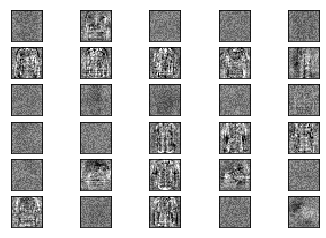

Weights with 4000 data points:


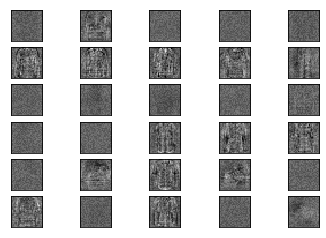

In [16]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(6, 5)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(6, 5)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]
In both images, we can see the weak shapes of some objects from the dataset. Especially, in some of them, we can see the boundaries of trouser, t-shirt, coat. An important thing here is, we can see more than 10 t-shirt shaped weights while we see only 1 trouser, no shoes, no bags. Also half of the images do not contain any shapes so It is hard to talk about weights via looking at them.


### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [17]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

best_SVM = SVC(C = 5.0, gamma = 0.005, kernel = 'rbf') #best is to do 4 (rbf)
best_SVM.fit(X_train, y_train)

print ('RESULTS FOR SVM')

SVM_training_error = 1 - best_SVM.score(X_train, y_train)

print("Training error SVM:")
print(SVM_training_error)

SVM_test_error = 1 - best_SVM.score(X_test, y_test)
print("Test error SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training error SVM:
0.07120000000000004
Test error SVM:
0.1382


In [18]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(C = 1)
regL2.fit(X_train, y_train)

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error =  1 - regL2.score(X_train, y_train)
test_error =  1 - regL2.score(X_test, y_test)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.068800
Test error (reg): 0.170200


C:\Users\arasu\anaconda3\envs\PythonGPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]

When we compare the results, SVM has by far the best accuracy among the others. Logistic Regression and NN are very close to each other. Surely, we can change parameters or try with different datasets to get different results but we can clearly see that SVM gives the best result on the dataset we used and among the methods/parameters we tried.